In [14]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from keras.datasets import cifar10
from keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# Load the CIFAR-10 Dataset

In [4]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# Display sample images from the dataset

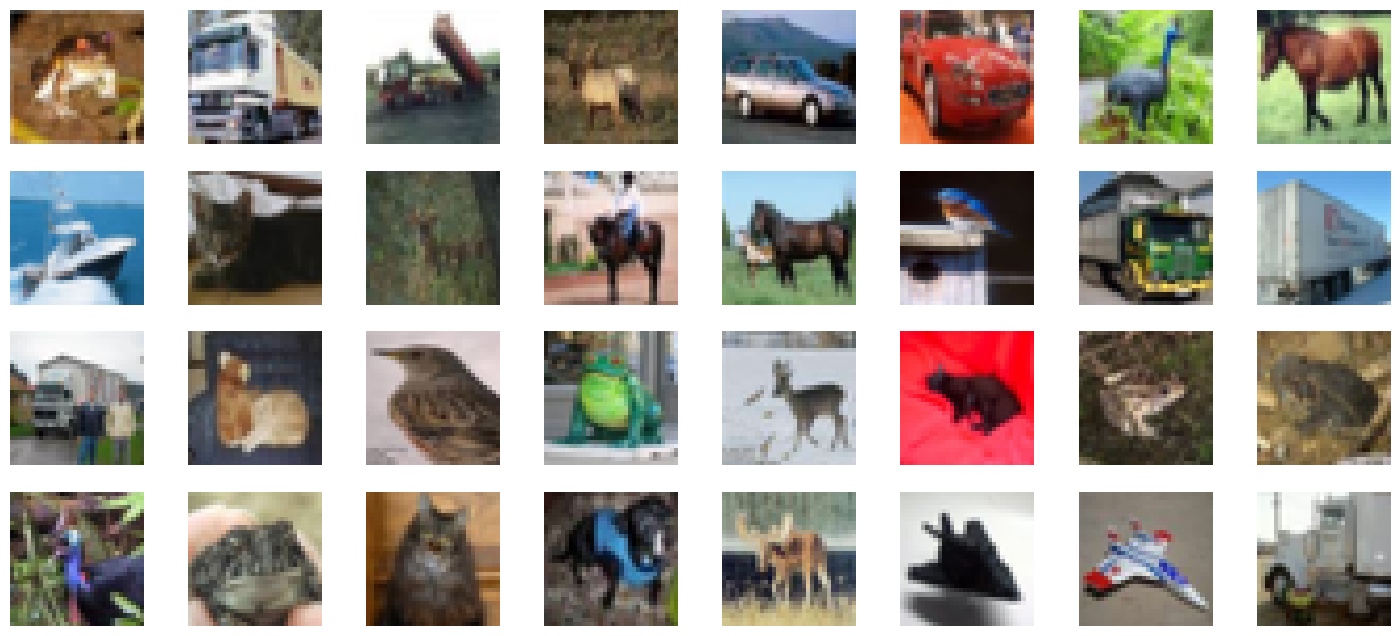

In [5]:
plt.figure(figsize=(18,8))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(X_train[i, :, :])
    plt.axis("off")

# Dataset Preprocessing

In [7]:
# Normalize the images to range [0,1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

#Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one_hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Original (integer) label for the first training sample:  [6]


In [10]:
print('After conversion to categorical one-hot encoded labels: ', y_train[0])

After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Dataset and Training Configuration Parameters

In [11]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen = True)
class TrainingConfig:
    EPOCHS: int = 31
    BATCH_SIZE: int =256
    LEARNING_RATE: float = 0.001

# CNN Model Implementation in Keras

In [15]:
def cnn_model(input_shape=(32, 32,3)):

    model = Sequential()

    # ---------------------------------
    # CON Block 1: 32 Filters, Maxpool.
    # ---------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape= input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # ---------------------------------
    # CON Block 2: 64 Filters, Maxpool.
    # ---------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # ---------------------------------
    # CON Block 3: 64 Filters, Maxpool.
    # ---------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # -----------------------------------
    # Flatten the convolutional features.
    # -----------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

# Create the model

In [16]:
model = cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [17]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)

# Train the model

In [18]:
history = model.fit(X_train,
                   y_train,
                   batch_size=TrainingConfig.BATCH_SIZE,
                   epochs=TrainingConfig.EPOCHS,
                   verbose=1,
                   validation_split=.3,
                   )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 231ms/step - accuracy: 0.1830 - loss: 2.2160 - val_accuracy: 0.3477 - val_loss: 1.7953
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 267ms/step - accuracy: 0.3657 - loss: 1.7404 - val_accuracy: 0.4543 - val_loss: 1.5190
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 269ms/step - accuracy: 0.4663 - loss: 1.4861 - val_accuracy: 0.5059 - val_loss: 1.3438
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 269ms/step - accuracy: 0.5312 - loss: 1.3128 - val_accuracy: 0.5151 - val_loss: 1.3759
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 273ms/step - accuracy: 0.5860 - loss: 1.1706 - val_accuracy: 0.6052 - val_loss: 1.1212
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 274ms/step - accuracy: 0.6374 - loss: 1.0229 - val_accuracy: 0.6476 - val_loss: 1.0199
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - accuracy: 0.6759 - loss: 0.9208 - val_accuracy: 0.6560 - val_loss: 0.9817
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 266ms/step - accuracy: 0.7180 - loss: 0

# Plot the training results

In [21]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

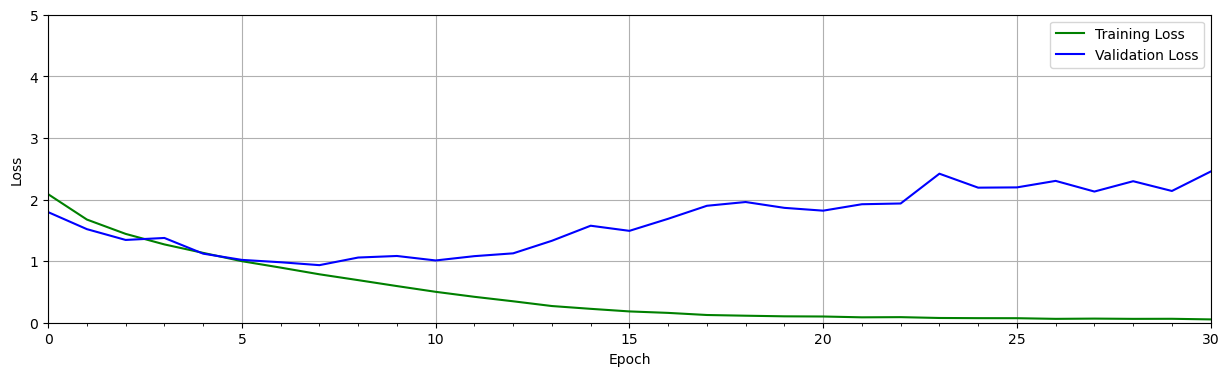

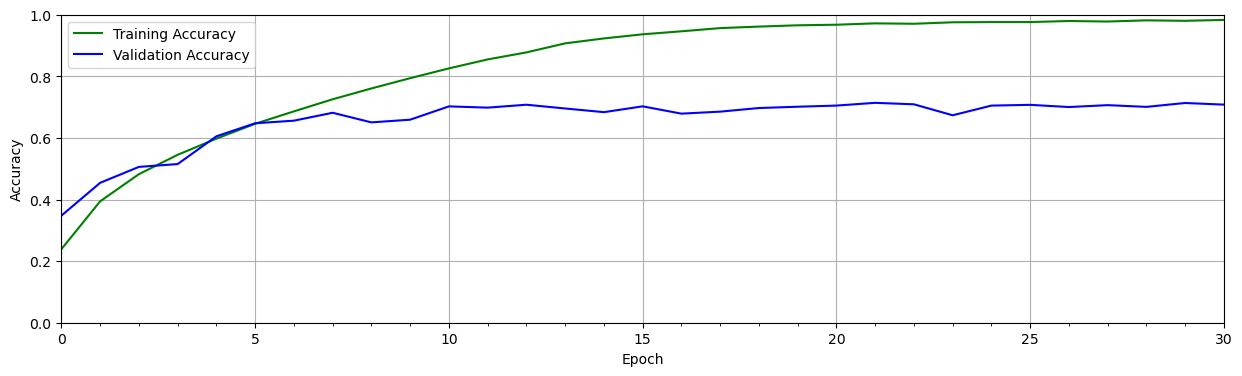

In [22]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

# Adding the Dropout to the Model

### Define the Model (with Dropout)

In [25]:
def cnn_model_dropout(input_shape=(32, 32,3)):

    model = Sequential()

    # ---------------------------------
    # CON Block 1: 32 Filters, Maxpool.
    # ---------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape= input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # ---------------------------------
    # CON Block 2: 64 Filters, Maxpool.
    # ---------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # ---------------------------------
    # CON Block 3: 64 Filters, Maxpool.
    # ---------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # -----------------------------------
    # Flatten the convolutional features.
    # -----------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

# Create the Model (with Dropout)

In [26]:
# Create the model
model_dropout = cnn_model_dropout()
model_dropout.summary()

/home/rajat/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model (with Dropout)

In [28]:
model_dropout.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)

# Train the model (with Dropout)

In [30]:
history = model_dropout.fit(X_train,
                           y_train,
                           batch_size=TrainingConfig.BATCH_SIZE,
                           epochs=TrainingConfig.EPOCHS,
                           verbose=1,
                           validation_split=.3,
                           )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 249ms/step - accuracy: 0.1553 - loss: 2.2402 - val_accuracy: 0.3248 - val_loss: 1.8664
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 277ms/step - accuracy: 0.3138 - loss: 1.8937 - val_accuracy: 0.3992 - val_loss: 1.6528
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - accuracy: 0.3893 - loss: 1.6656 - val_accuracy: 0.4283 - val_loss: 1.5881
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.4454 - loss: 1.5271 - val_accuracy: 0.4087 - val_loss: 1.6829
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 274ms/step - accuracy: 0.4866 - loss: 1.4245 - val_accuracy: 0.5172 - val_loss: 1.3397
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.5273 - loss: 1.3170 - val_accuracy: 0.4697 - val_loss: 1.5530
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - accuracy: 0.5581 - loss: 1.2340 - val_accuracy: 0.5838 - val_loss: 1.1635
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - accuracy: 0.5847 - loss: 1

# PLot the training results.

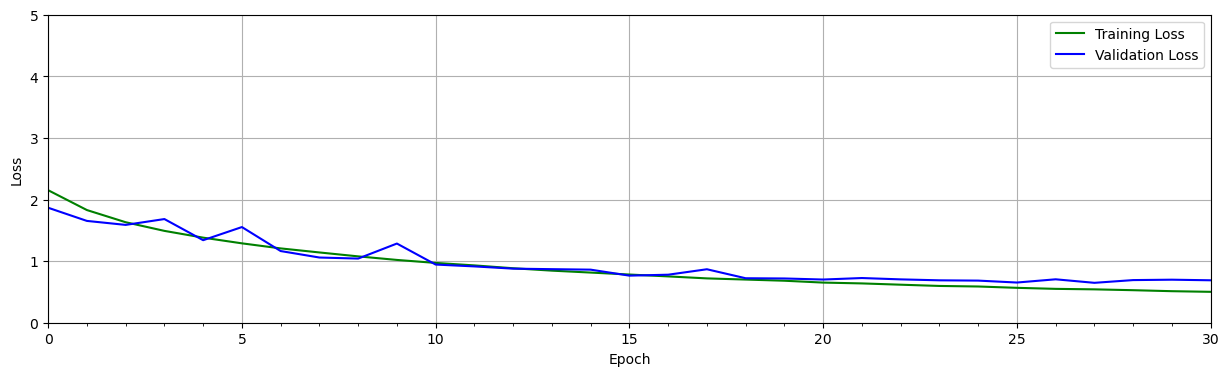

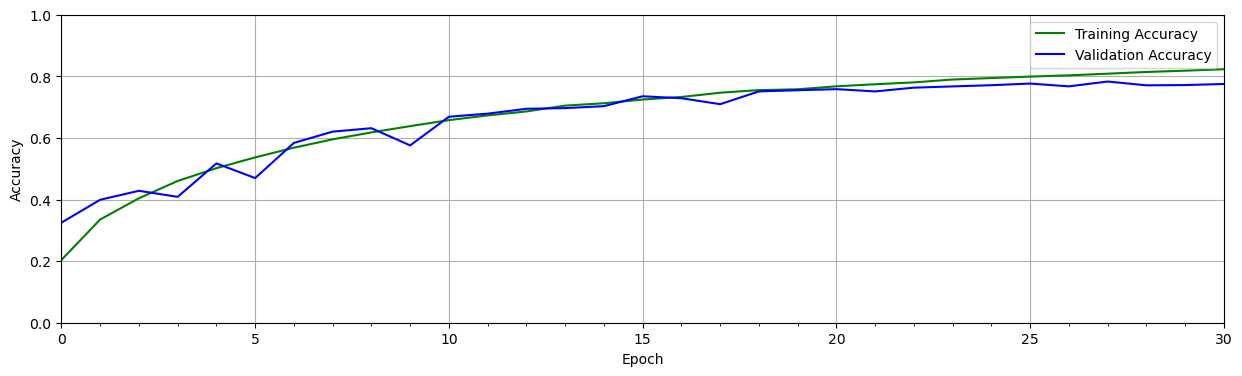

In [35]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

# Saving and loading models

### Saving the model

In [40]:
# Using the save() method, the model will be saved to the file system in the 'SavedModel' format
model_dropout.save("CIFAR10_model_dropout.keras")

### Loading Models

In [42]:
from keras import models
reloaded_model_dropout = models.load_model('CIFAR10_model_dropout.keras')

# Model Evaluation

### Evaluate the model on the test dataset

In [44]:
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7756 - loss: 0.7024
Test accuracy: 77.590


### MAke predictions on sample

In [48]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 3
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0 : num_rows * num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction accuracy:  0.77


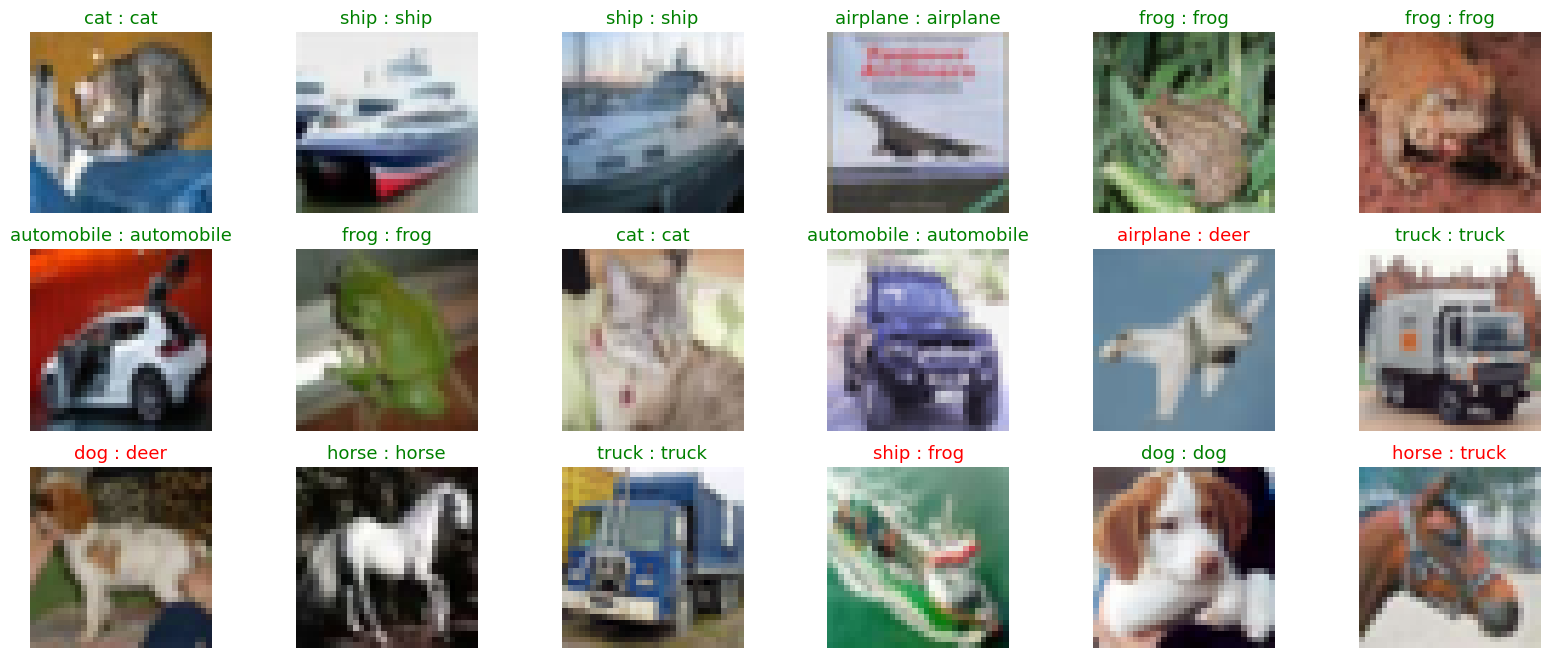

In [49]:
evaluate_model(X_test, reloaded_model_dropout)

# Confusion matrix

In [50]:
# Generate predictions from the test dataset.
predictions = reloaded_model_dropout.predict(X_test)

# For each sample image in the test dataset, select class label with the highest probability
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


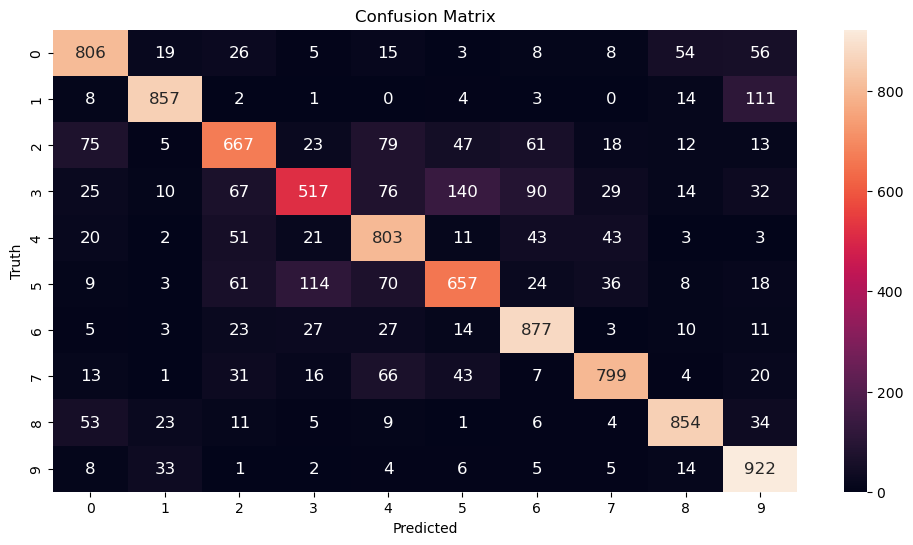

In [51]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[12, 6])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()